In [5]:
#!/usr/bin/env python
# encoding: utf-8
# Numerical Packages
import numpy as np
import pandas as pd

#Common packages
import copy
from tqdm import tqdm
 
#Plot's Making  Packages
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

#System Packages
import importlib
import time
import os
from os.path import isdir, isfile, join
import logging

importlib.reload(logging)
logging.basicConfig(level = logging.INFO)

# Learning packages
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from joblib import dump, load



%config InlineBackend. figure_format = 'retina'

In [13]:
HOMEPATH = "/dicos_ui_home/alanchung/Universality_Boosetd_Higgs/"
Data_High_Level_Features_path =  HOMEPATH + "Data_High_Level_Features/"
savepath = HOMEPATH + "Data_ML/"

try:
    
    data_train = {
            "herwig_ang_train" : 0,
            "pythia_def_train" : 0,
            "pythia_vin_train" : 0,
            "pythia_dip_train" : 0,
#             "sherpa_def_train" : 0
            }  
    
#     data_test = {
#             "herwig_ang_test" : 0,
#             "pythia_def_test" : 0,
#             "pythia_vin_test" : 0,
#             "pythia_dip_test" : 0,
# #             "sherpa_def_test" : 0
#             }  
    
#     data_val = {
#             "herwig_ang_val" : 0,
#             "pythia_def_val" : 0,
#             "pythia_vin_val" : 0,
#             "pythia_dip_val" : 0,
# #             "sherpa_def_val" : 0
#             }  
    
    
    for i, element in enumerate(data_train):
        logging.info(element)
#         data_train[element] = pd.read_csv(savepath + "BDT/" + str(element) + ".csv")
        
    
        """
        Pt Range Study
        """
        pt_min, pt_max = 300, 500
        tmp = pd.read_csv(HOMEPATH + "Notebook/KFold_BDT/" + str(element) + ".csv")
        tmp = tmp[(tmp["PTJ_0"] >= pt_min)  & (tmp["PTJ_0"] < pt_max)]
        tmp = tmp[(tmp["MJ_0"] >= 110)  & (tmp["MJ_0"] < 160)]
        data_train[element] = shuffle(tmp)
        
#     for i, element in enumerate(data_test):
# #         data_test[element] = pd.read_csv(savepath + "BDT/" + str(element) + ".csv")
        
#         tmp = pd.read_csv(savepath + "BDT/" + str(element) + ".csv")
#         tmp = tmp[(tmp["PTJ1_0"] >= pt_min)  & (tmp["PTJ1_0"] < pt_max)]
#         tmp = tmp[(tmp["MJ1_0"] >= 110)  & (tmp["MJ1_0"] < 160)]
#         data_test[element] = tmp
        
#     for i, element in enumerate(data_val):
# #         data_val[element] = pd.read_csv(savepath + "BDT/" + str(element) + ".csv")

#         tmp = pd.read_csv(savepath + "BDT/" + str(element) + ".csv")
#         tmp = tmp[(tmp["PTJ1_0"] >= pt_min)  & (tmp["PTJ1_0"] < pt_max)]
#         tmp = tmp[(tmp["MJ1_0"] >= 110)  & (tmp["MJ1_0"] < 160)]
#         data_val[element] = tmp

    logging.info("All Files are loaded!")

    logging.info("H jet : QCD jet = 1 : 1")
    logging.info("\r")
#     print("{:^8}{:^15}".format("","Pythia Default"))
#     print("{:^8}{:^15}".format("Train #",len(data_train["pythia_def_train"])))
#     print("{:^8}{:^15}".format("Test #",len(data_test["pythia_def_test"])))
#     print("{:^8}{:^15}".format("Val. #",len(data_val["pythia_def_val"])))
    
    
    train = [ len(data_train[element]) for j, element in enumerate(data_train)]
#     test = [len(data_test[element]) for j, element in enumerate(data_test)]
#     val = [len(data_val[element]) for j, element in enumerate(data_val)]
    logging.info("{:^8}{:^15}{:^15}{:^15}{:^15}".format("","Herwig Angular","Pythia Default","Pythia Vincia","Pythia Dipole"))
    logging.info("{:^8}{:^15}{:^15}{:^15}{:^15}".format("Train #",train[0],train[1],train[2],train[3]))
#     logging.info("{:^8}{:^15}{:^15}{:^15}{:^15}".format("Test #",test[0],test[1],test[2],test[3]))
#     logging.info("{:^8}{:^15}{:^15}{:^15}{:^15}".format("Val. #",val[0],val[1],val[2],val[3]))
    
    
    for i, element in enumerate(data_train):
        total_list = data_train[element].columns
        break
    
    logging.info("total_list: {}".format(total_list))

except:
    
    logging.info("Please create training, test and validation datasets.")
    

INFO:root:herwig_ang_train
INFO:root:pythia_def_train
INFO:root:pythia_vin_train
INFO:root:pythia_dip_train
INFO:root:All Files are loaded!
INFO:root:H jet : QCD jet = 1 : 1
INFO:root:
INFO:root:        Herwig Angular Pythia Default  Pythia Vincia  Pythia Dipole 
INFO:root:Train #     268760         268760         268760         268760     
INFO:root:total_list: Index(['GEN', 'SHO', 'PRO', 'MJ_0', 'PTJ_0', 'eta_0', 'phi_0', 't21_0',
       'D21_0', 'D22_0', 'C21_0', 'C22_0', 'MJ', 'PTJ', 'eta', 'phi', 't21',
       'D21', 'D22', 'C21', 'C22', 'weight', 'eventindex', 'WEIGHT', 'index',
       'target'],
      dtype='object')


# Define Dense Neural Network

In [14]:
def BDT_Model():
    
    rand = np.random.randint(1000000)
    clf_GBDT = GradientBoostingClassifier(
                n_estimators=1000,
                learning_rate=0.02,
                max_depth=5, 
                min_samples_split = 0.25,
                min_samples_leaf = 0.05,
    #             min_impurity_split = 0.00001,
    #             validation_fraction = 0.1,
                random_state= rand,  #np.random,
                verbose = 1
                )
#     clf_GBDT.fit(
#                 data_train[trainingdata][features],
#                 data_train[trainingdata]["target"]
#                 )

#     dump(clf_GBDT, savepath + str(model) + "_GBDT_leadingjet" + ".h5")

    return clf_GBDT


#  Call Model and Training

In [ ]:
DNN_Model_A1 = {
#               "herwig_ang" : 0,
              "pythia_def" : 0, 
#               "pythia_vin" : 0, 
#               "pythia_dip" : 0, 
#               "sherpa_def" : 0,
            }


features = ["MJ1_0","t211_0","D211_0","D221_0","C211_0","C221_0"] 


kf = KFold(n_splits = 10)
# kf = GroupKFold(n_splits = 100)
skf = StratifiedKFold(n_splits = 2, random_state = 7, shuffle = True) 

for i,(model, trainingdata) in enumerate(zip(DNN_Model_A1, data_train)): 
    print("model:", model, "trainingdata:", trainingdata)
    
    for model_index, (train_index, val_index) in enumerate(kf.split(data_train[trainingdata]["target"])):
        
        print("TRAIN:", train_index, "VAL:", val_index)
        training_data = data_train[trainingdata].iloc[train_index]
        validation_data = data_train[trainingdata].iloc[val_index]
        
        print(len(training_data[training_data["target"]==1])/len(training_data))
        print(len(validation_data[validation_data["target"]==0])/len(validation_data))
        print(len(training_data)/len(data_train[trainingdata]))
        print(len(validation_data)/len(data_train[trainingdata]))
        print(model_index)

In [17]:
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
print("######################################################################################")
print("\n")
############################################################################################################################################################
 
features = ["MJ1_0","t211_0","D211_0","D221_0","C211_0","C221_0"] #7/14
# features = ["MJ1_0","t211_0","D211_0","D221_0","C211_0","C221_0","MJ2_0","t212_0","D212_0","D222_0","C212_0","C222_0"] # 7/14
# features = ["MJ2_0","t212_0","D212_0","D222_0","C212_0","C222_0"]#7/27

BDT_Model_A1 = {
#               "herwig_ang" : 0,
              "pythia_def" : 0, 
#               "pythia_vin" : 0, 
#               "pythia_dip" : 0, 
#               "sherpa_def" : 0,
            }


n_splits = 100
kf = KFold(n_splits = n_splits)





                         
# skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True) 



for i,(model, trainingdata) in enumerate(zip(DNN_Model_A1, data_train)):
    print("model:", model, "trainingdata:", trainingdata)
    print("Training data length: {}".format(len(data_train[trainingdata])))
    
    for model_index, (train_index, val_index) in enumerate(kf.split(data_train[trainingdata]["target"])):
        training_data = data_train[trainingdata].iloc[train_index]
        validation_data = data_train[trainingdata].iloc[val_index]
        
        print(len(training_data[training_data["target"]==1])/len(training_data))
        print(len(validation_data[validation_data["target"]==1])/len(validation_data))

        try:
            DNN_Model_A1[model] = load_model("./Pythia_KFold/" + str(model) + "_DNN_"+str(model_index)+ ".h5")
            print(str(model) + " DNN model 1 is loaded!")
            print("######################################################################################")
            print("\n")

        except:
            print("Let's train a DNN model for {}".format(model))
            print("######################################################################################")
            print("\n")

            ticks_1 = time.time()

            model_DNN = DNN_Model(model+"_"+str(model_index))

            Performance_Frame = {
                    "AUC" : [0],
                    "max_sig" : [0],
                    "r05" : [0],
                    "time": [0]
                    }
            
            

            clf_GBDT.fit(
                np.asarray(training_data[features]), np.asarray(training_data["target"]),\
                )

            dump(clf_GBDT, savepath + str(model) + "_GBDT_leadingjet" + ".h5")
            
            
            DNN_Model_A1[model] = model_DNN
            
            prediction_test =  model_DNN.predict(np.asarray(validation_data[features]))
            discriminator_test = prediction_test
            discriminator_test = discriminator_test/(max(discriminator_test))
            
            Performance_Frame["AUC"][0] = metrics.roc_auc_score(validation_data["target"], discriminator_test)
            FalsePositiveFull, TruePositiveFull, _ = metrics.roc_curve(validation_data["target"], discriminator_test)
            tmp = np.where(FalsePositiveFull != 0)
            Performance_Frame["max_sig"][0] = max(TruePositiveFull[tmp]/np.sqrt(FalsePositiveFull[tmp])) 
            tmp = np.where(TruePositiveFull >= 0.5)
            Performance_Frame["r05"][0]= 1./FalsePositiveFull[tmp[0][0]]
            
            Performance_Frame["time"][0] = (time.time() - ticks_1)/60.
            
            dataframe = pd.DataFrame(Performance_Frame)
            
            
            try:
                save_to_csvdata = pd.read_csv("./Pythia_KFold/"+str(model)+"_Performance_Table_"+str(pt_min)+str(pt_max)+".csv")
                DATA = pd.concat([save_to_csvdata, dataframe], ignore_index=True, axis=0,join='inner')
                DATA.to_csv("./Pythia_KFold/"+str(model)+"_Performance_Table_"+str(pt_min)+str(pt_max)+".csv", index = 0)
                
            except:
                dataframe.to_csv("./Pythia_KFold/"+str(model)+"_Performance_Table_"+str(pt_min)+str(pt_max)+".csv", index = 0)
                
            
            ticks_2 = time.time()
            ############################################################################################################################################################
            totaltime =  ticks_2 - ticks_1
            print("\n")
            print("\033[3;33mTime consumption : {:.4f} min for CNN\033[0;m".format(totaltime/60.))
            print("######################################################################################")
            print("\n")

            if model_index == 1:
                break

Sun Aug 08 12:48:15 2021
######################################################################################


model: pythia_def trainingdata: pythia_def_train
Training data length: 1326898
0.5268298735792222
0.5248323159243349
Let's train a DNN model for pythia_def
######################################################################################


Model: "Model_DNN_pythia_def_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
_________________________________________________________________
dropout_4 (Dropout)          (None, 1)                 0         
Total params: 2

# Learning Curves

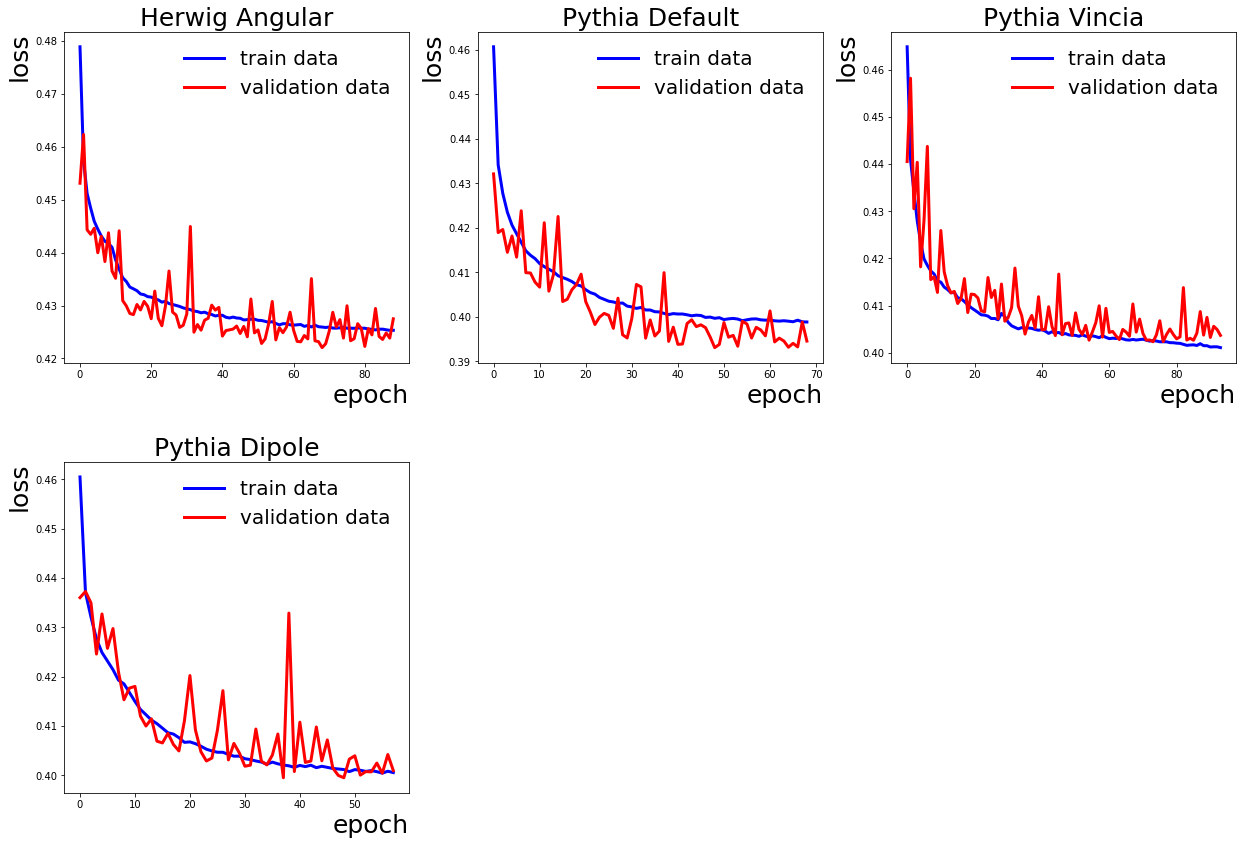

In [10]:
HOMEPATH = "/dicos_ui_home/alanchung/UniversalityDNN_DiHiggs/"
savepath = HOMEPATH + "Data_ML/"

# axis = 1
# if axis == 0:
#     process = "QCD"
# elif axis == 1:
#     process = "H Jet"


DNN_Model_A1_name = [
                 "Herwig Angular", 
                 "Pythia Default",
                 "Pythia Vincia",
                 "Pythia Dipole",  
#                  "Sherpa Default"
                ]

plt.figure(figsize=(21,14))
for i,(name, model) in enumerate(zip(DNN_Model_A1_name, DNN_Model_A1)): 
    plot_axis = plt.subplot(2,3,i+1)

    history = pd.read_csv(savepath + "DNN_Models/" + model + "_history_DNN_leadingjet.csv")

    
    plot_axis.plot(history["loss"], label='train data',c='blue',linewidth = 3)
    plot_axis.plot(history["val_loss"], label='validation data',c='red',linewidth = 3)

    plt.title(name, fontsize=25)

    plot_axis.set_ylabel('loss', fontsize=25,horizontalalignment='right',y=1)
    plot_axis.set_xlabel('epoch', fontsize=25,horizontalalignment='right',x=1)
    plot_axis.legend(loc='best', prop={'size':20}, edgecolor = "w",fancybox=False, framealpha=0)

#     plt.tick_params(which='minor',width=0)
#     plt.tick_params(labelsize=25)
    # plt.savefig("./Figures/learning_curve.pdf", transparent=True)
    
#     plot_axis.set_ylim((0,0.01))
#     plot_axis.set_xlim((400,500))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

# Perfromance

In [11]:
HOMEPATH = "/dicos_ui_home/alanchung/UniversalityDNN_DiHiggs/"
savepath = HOMEPATH + "Data_ML/"

# axis = 1
# if axis == 0:
#     process = "QCD"
# elif axis == 1:
#     process = "H Jet"


DNN_Model_A1_name = [
                 "Herwig Angular", 
                 "Pythia Default",
                 "Pythia Vincia", 
                 "Pythia Dipole", 
#                  "Sherpa Default"
                ]

Performance_Frame = {
                    "AUC" : 0,
                    "max_sig" : 0,
                    "r05" : 0
                    }



try:
    for metric in Performance_Frame:
        Performance_Frame[metric] = pd.read_csv(savepath + "DNN_Models/" + str(metric) + ".csv")
        
    print("All Performance_Frame are loaded!!")
    print("\n")
    
except:

    performance = {
                "AUC" : np.zeros((5,5)),
                "max_sig" : np.zeros((5,5)),
                "r05" : np.zeros((5,5))
                }

    for i, testdata in enumerate(data_test): 

        print("Test Data: {}".format(testdata))



        for j, model in enumerate(DNN_Model_A1):

            prediction_test =  DNN_Model_A1[model].predict(data_test[testdata][features])
            discriminator_test = prediction_test
            discriminator_test = discriminator_test/(max(discriminator_test))


            performance["AUC"][j,i] = metrics.roc_auc_score(data_test[testdata]["target"],discriminator_test)
            FalsePositiveFull, TruePositiveFull, _ = metrics.roc_curve(data_test[testdata]["target"],discriminator_test)
            tmp = np.where(FalsePositiveFull != 0)
            performance["max_sig"][j,i] = max(TruePositiveFull[tmp]/np.sqrt(FalsePositiveFull[tmp])) 
            tmp = np.where(TruePositiveFull >= 0.5)
            performance["r05"][j,i] = 1./FalsePositiveFull[tmp[0][0]]

    for i in performance:
        element = performance[i]

        Performance_Frame[i] = pd.DataFrame(
                        {"Herwig Angular": [element[0,0],element[1,0],element[2,0],element[3,0], np.average(element[:4,0]),np.std(element[:4,0])],
                         "Pythia Default": [element[0,1],element[1,1],element[2,1],element[3,1], np.average(element[:4,1]),np.std(element[:4,1])],
                         "Pythia Vincia":  [element[0,2],element[1,2],element[2,2],element[3,2], np.average(element[:4,2]),np.std(element[:4,2])],
                         "Pythia Dipole":  [element[0,3],element[1,3],element[2,3],element[3,3], np.average(element[:4,3]),np.std(element[:4,3])],
                         "Average": [np.average(element[0,:4]),np.average(element[1,:4]),np.average(element[2,:4]),np.average(element[3,:4]),0,0],
                         "STD": [np.std(element[0,:4]),np.std(element[1,:4]),np.std(element[2,:4]),np.std(element[3,:4]),0,0]
                        },
                        index=["Herwig Angular", "Pythia Default", "Pythia Vincia", "Pythia Dipole", "Average", "STD"]
                               )

        Performance_Frame[i].to_csv(savepath  + "DNN_Models/" +  str(i) + ".csv")



print("Models are trained by row and test to column.")
print("\r")

for element in Performance_Frame:
    number = Performance_Frame[element]
    print("Performance in "+ str(element))
    print("\r")
    print("{:^15}{:^15}{:^15}{:^15}{:^15}{:^15}{:^10}{:^10}".format("","Herwig Angular","Pythia Default","Pythia Vincia","Pythia Dipole","Sherpa Default", "Average", "STD"))

    for i, _ in enumerate(DNN_Model_A1_name):
        print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^10.3f}{:^10.3f}".format(DNN_Model_A1_name[i],number["Herwig Angular"][i], number["Pythia Default"][i], number["Pythia Vincia"][i], number["Pythia Dipole"][i], 0, number["Average"][i], number["STD"][i]))

    print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format("Average",number["Herwig Angular"][i+1], number["Pythia Default"][i+1], number["Pythia Vincia"][i+1], number["Pythia Dipole"][i+1], 0))
    print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format("STD",number["Herwig Angular"][i+2], number["Pythia Default"][i+2], number["Pythia Vincia"][i+2], number["Pythia Dipole"][i+2], 0))
    print("\r")



Test Data: herwig_ang_test
Test Data: pythia_def_test
Test Data: pythia_vin_test
Test Data: pythia_dip_test
Models are trained by row and test to column.

Performance in AUC

               Herwig Angular Pythia Default  Pythia Vincia  Pythia Dipole Sherpa Default  Average     STD    
Herwig Angular      0.831          0.838          0.831          0.837          0.000       0.834     0.004   
Pythia Default      0.819          0.857          0.845          0.841          0.000       0.840     0.014   
 Pythia Vincia      0.821          0.856          0.846          0.843          0.000       0.842     0.013   
 Pythia Dipole      0.829          0.855          0.846          0.845          0.000       0.844     0.010   
    Average         0.825          0.852          0.842          0.841          0.000     
      STD           0.005          0.008          0.007          0.003          0.000     

Performance in max_sig

               Herwig Angular Pythia Default  Pythia Vincia  Py

Training Data: herwig_ang_train, Test Data: herwig_ang_test


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide


Training Data: pythia_def_train, Test Data: pythia_def_test


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide


Training Data: pythia_vin_train, Test Data: pythia_vin_test


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide


Training Data: pythia_dip_train, Test Data: pythia_dip_test


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide


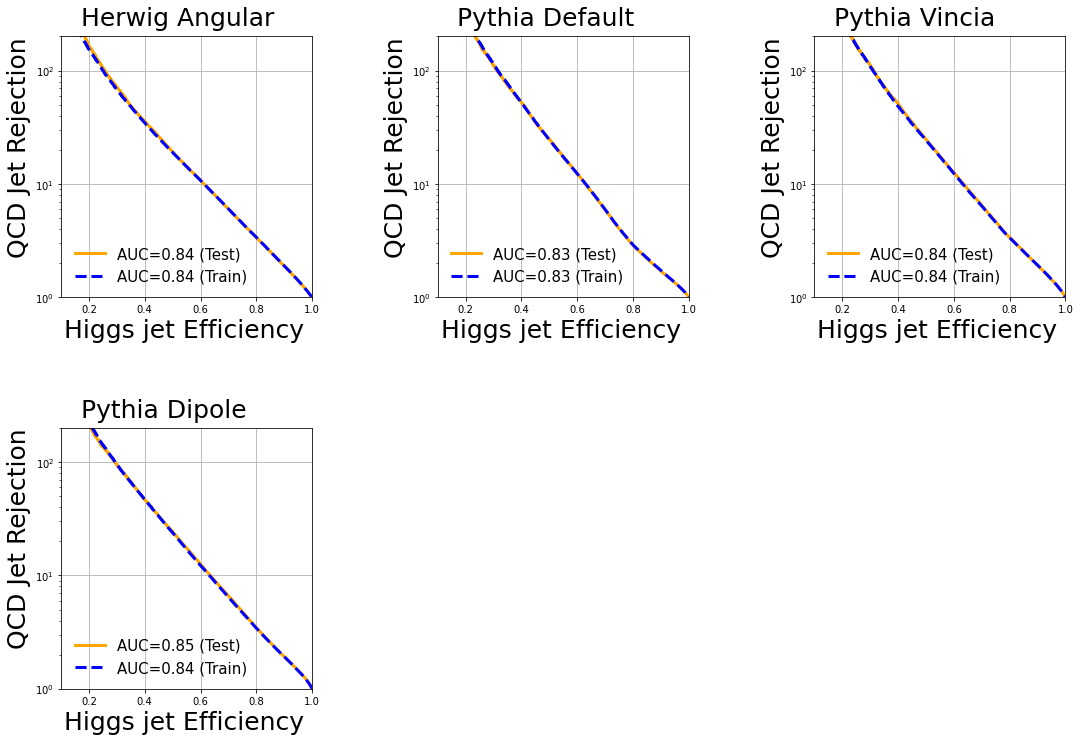

In [14]:
DNN_Model_A1_name = [
                 "Herwig Angular", 
                 "Pythia Default",
                 "Pythia Vincia", 
                 "Pythia Dipole", 
#                  "Sherpa Default"
                ]


plt.figure(figsize=(18,12))
for i,(traindata, testdata, model) in enumerate(zip(data_train, data_test, DNN_Model_A1)): 
    
    print("Training Data: {}, Test Data: {}".format(traindata, testdata))

    plot_axis = plt.subplot(2,3,i+1)

    prediction_DNN_test = DNN_Model_A1[model].predict(data_test[testdata][features])
    prediction_DNN_train = DNN_Model_A1[model].predict(data_train[traindata][features])

    discriminator_test = prediction_DNN_test
    discriminator_train = prediction_DNN_train

    discriminator_test = discriminator_test/(max(discriminator_test))
    discriminator_train = discriminator_train/(max(discriminator_train))
    


    test_auc_DNN_test = metrics.roc_auc_score(data_test[testdata]["target"],discriminator_test)
    FalsePositiveFull_DNN_test, TruePositiveFull_DNN_test, _ = metrics.roc_curve(data_test[testdata]["target"],discriminator_test)

    train_auc_DNN_train = metrics.roc_auc_score(data_train[traindata]["target"],discriminator_train)
    FalsePositiveFull_DNN_train, TruePositiveFull_DNN_train, _ = metrics.roc_curve(data_train[traindata]["target"],discriminator_train)


#     plt.plot(TruePositiveFull_CNN_test,1-FalsePositiveFull_CNN_test,"-", color='orange', linewidth = 3, label='AUC={0:.2f} (Test)'.format(test_auc_CNN_test))
#     plt.plot(TruePositiveFull_CNN_train,1-FalsePositiveFull_CNN_train,"--", color='b', linewidth = 3, label='AUC={0:.2f} (Train)'.format(train_auc_CNN_train))
    plt.plot(TruePositiveFull_DNN_test,1./FalsePositiveFull_DNN_test,"-", color='orange', linewidth = 3, label='AUC={0:.2f} (Test)'.format(test_auc_DNN_test))
    plt.plot(TruePositiveFull_DNN_train,1./FalsePositiveFull_DNN_train,"--", color='b', linewidth = 3, label='AUC={0:.2f} (Train)'.format(train_auc_DNN_train))



# plt.scatter(0.75,1./0.32, marker="D", s=300 , c='b')
# plt.scatter(0.70,1./0.13, marker="D", s=300 , c='orange')

#     plot_axis.set_xlim((0,1))
#     plot_axis.set_ylim((0,1))
    # plt.yscale("log")
    plt.xlim((0,1))
    plt.ylim((1, 1E+4))
    plt.yscale("log")
#     plot_axis.set_tick_params(axis='x', labelsize=25)
#     plot_axis.set_tick_params(axis='y', labelsize=25)
    # ax.yaxis.set_major_locator(MaxNLocator(5))
    # ax.xaxis.set_major_locator(MaxNLocator(5))
    plot_axis.set_xlabel('Higgs jet Efficiency ', fontsize=25,horizontalalignment='right',x=1)
    plot_axis.set_ylabel('QCD Jet Rejection', fontsize=25,horizontalalignment='right',y=1)
    plot_axis.legend(ncol=1,fontsize=15, edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
#     plt.tight_layout()
    plot_axis.text(x=0.17, y=2.5E+2, s=str(DNN_Model_A1_name[i]),fontsize=25) 

    plot_axis.set_xlim((0.1,1))
    plot_axis.set_ylim((1, 2E+2))
    plot_axis.set_yscale("log")
    plot_axis.grid()
# plt.savefig("./Higgs_Pt/Comparison_ROC.pdf", transparent=True)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

Training Data: herwig_ang_train, Test Data: herwig_ang_test
Training Data: pythia_def_train, Test Data: pythia_def_test
Training Data: pythia_vin_train, Test Data: pythia_vin_test
Training Data: pythia_dip_train, Test Data: pythia_dip_test


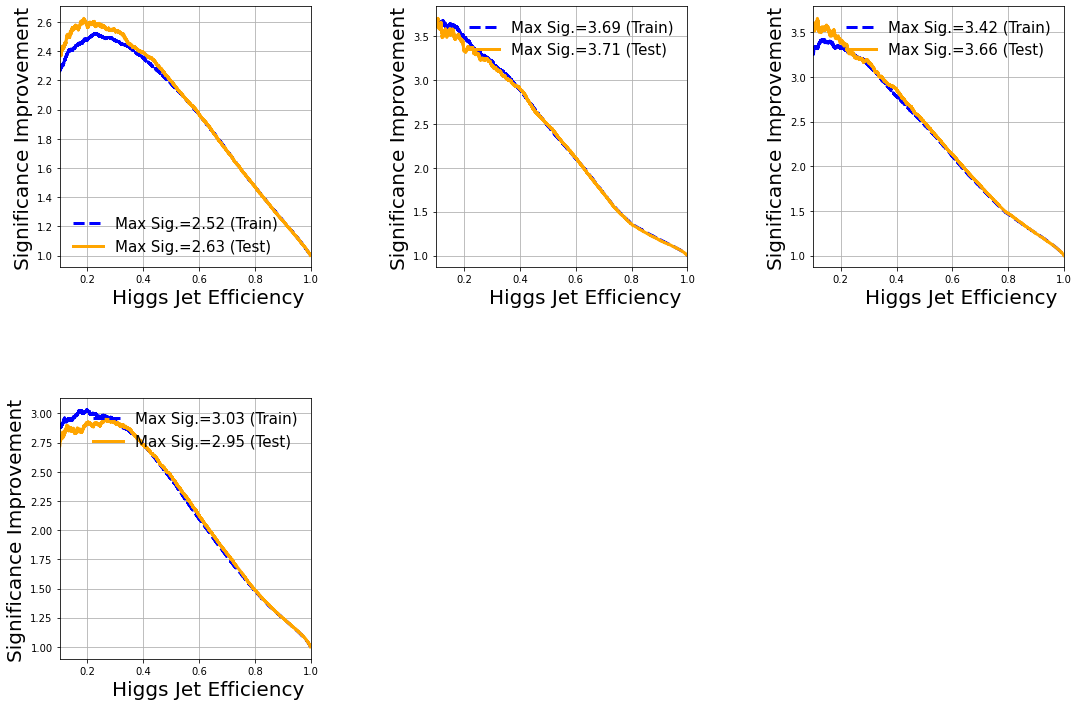

In [15]:
DNN_Model_A1_name = [
                 "Herwig Angular", 
                 "Pythia Default",
                 "Pythia Vincia", 
                 "Pythia Dipole", 
#                  "Sherpa Default"
                ]


plt.figure(figsize=(18,12))
for i,(traindata, testdata, model) in enumerate(zip(data_train, data_test, DNN_Model_A1)): 
    
    print("Training Data: {}, Test Data: {}".format(traindata, testdata))

    plot_axis = plt.subplot(2,3,i+1)

    prediction_DNN_test = DNN_Model_A1[model].predict(data_test[testdata][features])
    prediction_DNN_train = DNN_Model_A1[model].predict(data_train[traindata][features])

    discriminator_test = prediction_DNN_test
    discriminator_train = prediction_DNN_train

    discriminator_test = discriminator_test/(max(discriminator_test))
    discriminator_train = discriminator_train/(max(discriminator_train))
    


    test_auc_DNN_test = metrics.roc_auc_score(data_test[testdata]["target"],discriminator_test)
    FalsePositiveFull_DNN_test, TruePositiveFull_DNN_test, _ = metrics.roc_curve(data_test[testdata]["target"],discriminator_test)

    train_auc_DNN_train = metrics.roc_auc_score(data_train[traindata]["target"],discriminator_train)
    FalsePositiveFull_DNN_train, TruePositiveFull_DNN_train, _ = metrics.roc_curve(data_train[traindata]["target"],discriminator_train)

    a = np.where(TruePositiveFull_DNN_test > 0.1)
    b = np.where(TruePositiveFull_DNN_train > 0.1)
#     plt.plot(TruePositiveFull_CNN_test,1-FalsePositiveFull_CNN_test,"-", color='orange', linewidth = 3, label='AUC={0:.2f} (Test)'.format(test_auc_CNN_test))
    max_sig_test = max(TruePositiveFull_DNN_test[a]/np.sqrt(FalsePositiveFull_DNN_test[a]))
    max_sig_train = max(TruePositiveFull_DNN_train[b]/np.sqrt(FalsePositiveFull_DNN_train[b]))
    plt.plot(TruePositiveFull_DNN_train[b],TruePositiveFull_DNN_train[b]/np.sqrt(FalsePositiveFull_DNN_train[b]),"--", color='b', linewidth = 3, label='Max Sig.={0:.2f} (Train)'.format(max_sig_train))
    plt.plot(TruePositiveFull_DNN_test[a],TruePositiveFull_DNN_test[a]/np.sqrt(FalsePositiveFull_DNN_test[a]),"-", color='orange', linewidth = 3, label='Max Sig.={0:.2f} (Test)'.format(max_sig_test))

# plt.scatter(0.75,1./0.32, marker="D", s=300 , c='b')
# plt.scatter(0.70,1./0.13, marker="D", s=300 , c='orange')

    plot_axis.set_xlim((0.1,1))
#     plot_axis.set_ylim((0.1,3))
    # plt.yscale("log")
    plt.xlim((0.1,1))
#     plt.ylim((1, 1E+4))
#     plt.yscale("log")
#     plot_axis.set_tick_params(axis='x', labelsize=25)
#     plot_axis.set_tick_params(axis='y', labelsize=25)
    # ax.yaxis.set_major_locator(MaxNLocator(5))
    # ax.xaxis.set_major_locator(MaxNLocator(5))
    plot_axis.set_xlabel('Higgs Jet Efficiency ', fontsize=20,horizontalalignment='right',x=1)
    plot_axis.set_ylabel('Significance Improvement', fontsize=20,horizontalalignment='right',y=1)
    plot_axis.legend(ncol=1,fontsize=15, edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
#     plt.tight_layout()
#     plot_axis.text(x=0.17, y=2.5, s=str(DNN_Model_A1_name[i]),fontsize=25) 
#     plot_axis.text(x=0.17, y=3.1, s=str(DNN_Model_A1_name[i]),fontsize=25) 

    plot_axis.set_xlim((0.1,1))
#     plot_axis.set_ylim((1, 2E+2))
#     plot_axis.set_yscale("log")
    plot_axis.grid()
# plt.savefig("./Higgs_Pt/Comparison_ROC.pdf", transparent=True)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [ ]:
# Model = load_model(savepath + "NN_Models/model_CNN_2.h5")


DataTest = {
            "herwig_ang_test" : 0,
            "pythia_def_test" : 0,
            "pythia_vin_test" : 0,
            "pythia_dip_test" : 0,
#             "sherpa_def_test" : 0
        }  

for i,(element, testdata, model) in enumerate(zip(DataTest, data_test, DNN_Model_A1)): 
        

    print("Test Data: {}".format(testdata))
    
    DataTest[element] = pd.read_csv(savepath + "BDT/" + str(element) + ".csv")
    
    
    features_jet1 = ["MJ1_0","t211_0","D211_0","D221_0","C211_0","C221_0"]
    x_test_j1 = DataTest[element][features_jet1]
    features_jet2 = ["MJ2_0","t212_0","D212_0","D222_0","C212_0","C222_0"]
    x_test_j2 = DataTest[element][features_jet2]
    
    prediction_j1 = DNN_Model_A1[model].predict(np.array(x_test_j1))
    prediction_j2 = DNN_Model_A1[model].predict(np.array(x_test_j2))


    DataTest[element]["predict_j1"] = prediction_j1
    DataTest[element]["predict_j2"] = prediction_j2
    


In [21]:
for i,(element) in enumerate(DataTest): 
        
    print(element)
    sample =DataTest[element]
    eff1j = 0.5
    eff2j = 0.8

    H = sample[sample["target"] == 1]
    QCD = sample[sample["target"] == 0]
    a = len(H)
    a_ = len(QCD)
    print("Original # of H: {} and # of QCD: {} ".format(a,a_))
    print("#########")
    cut_j1 = 0
    for i in range(0,1001):
        tmp = H[H["predict_j1"] >= cut_j1]

        if len(tmp)/len(H) < eff1j:
            print("cut_j1: {:.3f}".format(cut_j1))
            break

        cut_j1 += 1/1000


    H = sample[(sample["target"] == 1) & (sample["predict_j1"] >= cut_j1)]
    QCD = sample[(sample["target"] == 0) & (sample["predict_j1"] >= cut_j1)]
    b = len(H)
    b_ = len(QCD)
    print("Passing 1st jet BDT cut at eff.: {} # of H: {} and # of QCD: {} ".format(eff1j,b,b_))
    print("total rate: H: {:.3f} QCD: {:.6f} ".format(b/a,b_/a_))
    print("#########")

    cut_j2 = 0
    for i in range(0,1001):
        tmp = H[H["predict_j2"] >= cut_j2]

        if len(tmp)/len(H) < eff2j:
            print("cut_j2: {:.3f}".format(cut_j2))
            break

        cut_j2 += 1/1000

    H = sample[(sample["target"] == 1) & (sample["predict_j1"] >= cut_j1) & (sample["predict_j2"] >= cut_j2)]
    QCD = sample[(sample["target"] == 0) & (sample["predict_j1"] >= cut_j1) & (sample["predict_j2"] >= cut_j2)]
    c = len(H)
    c_ = len(QCD)
    print("Passing 2nd jet BDT cut at eff.: {} # of H: {} and # of QCD: {} ".format(eff2j,c,c_))
    print("total rate: H: {:.3f} QCD: {:.6f} ".format(c/a,c_/a_))
    print("#########")
    H = H[H["four_b_tag"] == 1]
    QCD = QCD[QCD["four_b_tag"] == 1]
    d = len(H)
    d_ = len(QCD)
    print("Passing 4b tag: # of H: {} and # of QCD: {} ".format(d,d_))
    # print(d/c,d_/c_)
    print("total rate: H: {:.3f} QCD: {:.6f} ".format(d/a,d_/a_))
    
    print("#########")
    print("\n")

herwig_ang_test
Original # of H: 13439 and # of QCD: 13439 
#########
cut_j1: 0.757
Passing 1st jet BDT cut at eff.: 0.5 # of H: 6711 and # of QCD: 598 
total rate: H: 0.499 QCD: 0.044497 
#########
cut_j2: 0.260
Passing 2nd jet BDT cut at eff.: 0.8 # of H: 5364 and # of QCD: 275 
total rate: H: 0.399 QCD: 0.020463 
#########
Passing 4b tag: # of H: 4923 and # of QCD: 0 
total rate: H: 0.366 QCD: 0.000000 
#########


pythia_def_test
Original # of H: 13439 and # of QCD: 13439 
#########
cut_j1: 0.764
Passing 1st jet BDT cut at eff.: 0.5 # of H: 6715 and # of QCD: 418 
total rate: H: 0.500 QCD: 0.031104 
#########
cut_j2: 0.326
Passing 2nd jet BDT cut at eff.: 0.8 # of H: 5366 and # of QCD: 176 
total rate: H: 0.399 QCD: 0.013096 
#########
Passing 4b tag: # of H: 4793 and # of QCD: 0 
total rate: H: 0.357 QCD: 0.000000 
#########


pythia_vin_test
Original # of H: 13439 and # of QCD: 13439 
#########
cut_j1: 0.798
Passing 1st jet BDT cut at eff.: 0.5 # of H: 6711 and # of QCD: 596 
tot

In [ ]:

# AUC = np.zeros((5,5))
# max_sig = np.zeros((5,5))
# r05 = np.zeros((5,5))


# for i, testdata in enumerate(data_test): 
    
#     print("Test Data: {}".format(testdata))
    

    
#     for j, model in enumerate(DNN_Model_A1):
        
#         prediction_test =  DNN_Model_A1[model].predict(data_test[testdata][features])
#         discriminator_test = prediction_test
#         discriminator_test = discriminator_test/(max(discriminator_test))
        
        
#         AUC[j,i] = metrics.roc_auc_score(data_test[testdata]["target"],discriminator_test)
#         FalsePositiveFull, TruePositiveFull, _ = metrics.roc_curve(data_test[testdata]["target"],discriminator_test)
#         tmp = np.where(FalsePositiveFull != 0)
#         max_sig[j,i] = max(TruePositiveFull[tmp]/np.sqrt(FalsePositiveFull[tmp])) 
#         tmp = np.where(TruePositiveFull >= 0.5)
#         r05[j,i] = 1./FalsePositiveFull[tmp[0][0]]

        
# print("Models are trained by row and test to column.")
# print("\r")
# print("Performance in AUC")
# print("\r")
# print("{:^15}{:^15}{:^15}{:^15}{:^15}{:^15}{:^10}{:^10}".format("","Herwig Angular","Pythia Default","Pythia Vincia","Pythia Dipole","Sherpa Default", "Average", "STD"))
# for i in range(len(DNN_Model_A1_name)):
#     print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^10.3f}{:^10.3f}".format(DNN_Model_A1_name[i],AUC[i,0], AUC[i,1], AUC[i,2], AUC[i,3], AUC[i,4], np.average(AUC[i,:4]), np.std(AUC[i,:4])))
# print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format("Average",np.average(AUC[:4,0]), np.average(AUC[:4,1]), np.average(AUC[:4,2]), np.average(AUC[:4,3]), np.average(AUC[:4,4])))
# print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format("STD",np.std(AUC[:4,0]), np.std(AUC[:4,1]), np.std(AUC[:4,2]), np.std(AUC[:4,3]), np.std(AUC[:4,4])))
# print("\r")
# print("Performance in Max Significance")
# print("\r")
# for i in range(len(DNN_Model_A1_name)):
#     print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^10.3f}{:^10.3f}".format(DNN_Model_A1_name[i],max_sig[i,0], max_sig[i,1], max_sig[i,2], max_sig[i,3], max_sig[i,4], np.average(max_sig[i,:4]), np.std(max_sig[i,:4])))

# print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format("Average",np.average(max_sig[:4,0]), np.average(max_sig[:4,1]), np.average(max_sig[:4,2]), np.average(max_sig[:4,3]), np.average(max_sig[:4,4])))
# print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format("STD",np.std(max_sig[:4,0]), np.std(max_sig[:4,1]), np.std(max_sig[:4,2]), np.std(max_sig[:4,3]), np.std(max_sig[:4,4])))    
# print("\r")
# print("1/fpr @ tpr = 0.5 (rejection at 50% signal efficiency)")
# print("\r")
# for i in range(len(DNN_Model_A1_name)):
#     print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^10.3f}{:^10.3f}".format(DNN_Model_A1_name[i],r05[i,0], r05[i,1], r05[i,2], r05[i,3], r05[i,4], np.average(r05[i,:4]), np.std(r05[i,:4])))
# print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format("Average",np.average(r05[:4,0]), np.average(r05[:4,1]), np.average(r05[:4,2]), np.average(r05[:4,3]), np.average(r05[:4,4])))
# print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format("STD",np.std(r05[:4,0]), np.std(r05[:4,1]), np.std(r05[:4,2]), np.std(r05[:4,3]), np.std(r05[:4,4])))    

